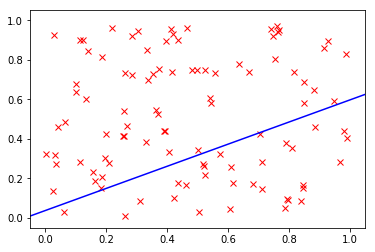

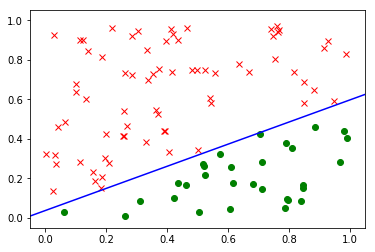

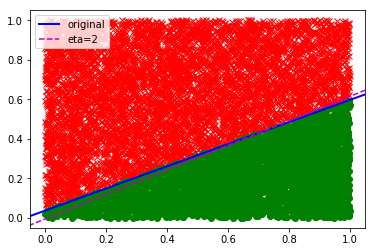

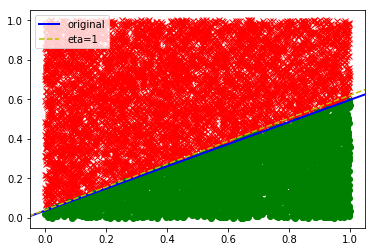

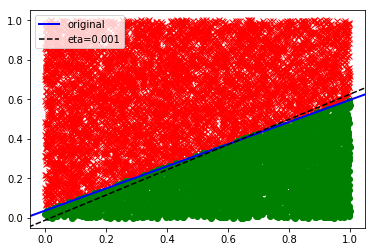

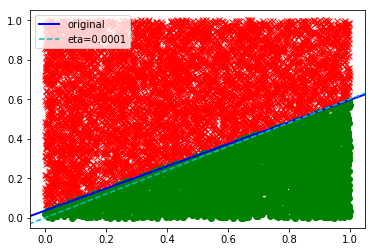

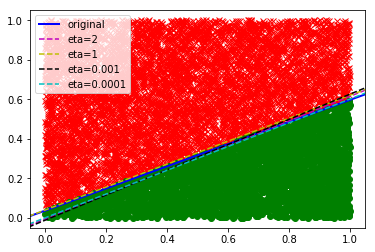

In [1]:
import random
import matplotlib.pyplot as mplt
import numpy as np
%matplotlib inline
def generateLine():
    line = np.random.random([2, 2])
    x1 = line[0, 0]
    y1 = line[0, 1]
    x2 = line[1, 0]
    y2 = line[1, 1]
    k = (y1 - y2) / (x1 - x2)
    b = y1 - k * x1
    # y = kx + b => -b -kx + y = 0 slope equation
    f = np.empty(3)
    f[0] = -b
    f[1] = -k
    f[2] = 1
    return f.reshape((3, 1))

def computeYOfLine(w, x):
    # w0 + w1*x + w2*y = 0
    if w[2, 0] == 0:

        return 0
    return -(w[0, 0] + w[1, 0] * x) / w[2, 0]

def myPlot(data,weight,label,style,xs,ys,limit):
    xt=data

    y = np.matmul(data, f)
    # we must use a one dimension array to index xt
    greatest = (y >= 0).reshape(limit) #greaters == greatest
    least = xt[~greatest] #lesses == least
    greatest = xt[greatest]

    mplt.plot(greatest[:, 1], greatest[:, 2], 'rx')
    mplt.plot(least[:, 1], least[:, 2], 'go')
    mplt.plot(xs, ys, "b-",label="original",linewidth=2)

    ys = [computeYOfLine(weight, xt) for xt in xs]
    mplt.plot(xs, ys, style,label=label)
    mplt.xlim((-0.05, 1.05))
    mplt.ylim((-0.05, 1.05))
    mplt.legend(loc="upper left")
    mplt.show()

# generate raw data using random and plot them on graph

x_ran_train_limit = 100
y = np.random.random([x_ran_train_limit, 2])
x_ran_train = np.concatenate((np.ones([x_ran_train_limit, 1]), y), axis=1)

x_ran_test_limit = 10000
y = np.random.random([x_ran_test_limit, 2])
x_ran_test = np.concatenate((np.ones([x_ran_test_limit, 1]), y), axis=1)

X=x_ran_train
dataSetLimit = x_ran_train_limit

f = generateLine()

mplt.plot(X[:, 1], X[:, 2], "rx")
# plot the line use x = -1, 2
xs = [-1, 2]
ys = [computeYOfLine(f, x) for x in xs]
mplt.plot(xs, ys, "b-")
mplt.xlim((-0.05, 1.05))
mplt.ylim((-0.05, 1.05))
mplt.show()



# classify data

y = np.matmul(X, f)
# we must use a one dimension array to index X
greatest = (y >= 0).reshape(dataSetLimit) #greaters == greatest
least = X[~greatest] #lesses == least
greatest = X[greatest]

mplt.plot(greatest[:, 1], greatest[:, 2], 'rx')
mplt.plot(least[:, 1], least[:, 2], 'go')
mplt.plot(xs, ys, "b-")
mplt.xlim((-0.05, 1.05))
mplt.ylim((-0.05, 1.05))
mplt.show()

for i in range(dataSetLimit):
    if y[i] < 0:
        y[i] = -1
    else:
        y[i] = 1

# run a perceptron learning algorithm
eta = 2
weight = np.empty((3, 1)) #w == weights

while True:
    flag = True
    for i in range(dataSetLimit):
        x = X[i]
        h = 1
        s=np.matmul(x,weight)
        if np.matmul(x, weight) < 0: 
            h = -1
        if h != y[i]:
            weight += (eta*(np.add(y[i],-s))* x).reshape((3, 1))
            flag = False
    if flag:
        break

# run a perceptron learning algorithm
eta1 = 1
weight1 = np.empty((3, 1)) #w == weights

while True:
    flag = True
    for i in range(dataSetLimit):
        x = X[i]
        h = 1
        s=np.matmul(x,weight1)
        if np.matmul(x, weight1) < 0: 
            h = -1
        if h != y[i]:
            weight1 += (eta1*(np.add(y[i],-s))* x).reshape((3, 1))
            flag = False
    if flag:
        break

eta2 = 0.001
weight2 = np.empty((3, 1)) #w == weights

while True:
    flag = True
    for i in range(dataSetLimit):
        x = X[i]
        h = 1
        s=np.matmul(x,weight2)
        if np.matmul(x, weight2) < 0:
            h = -1
        if h != y[i]:
            weight2 += (eta2*(np.add(y[i],-s))* x).reshape((3, 1))
            flag = False
    if flag:
        break

eta3 = 0.0001
weight3 = np.empty((3, 1))

while True:
    flag = True
    for i in range(dataSetLimit):
        x = X[i]
        h = 1
        s=np.matmul(x,weight3)
        if np.matmul(x, weight3) < 0:
            h = -1
        if h != y[i]:
            weight3 += (eta3*(np.add(y[i],-s))* x).reshape((3, 1))
            flag = False
    if flag:
        break


xt=x_ran_test
limit=x_ran_test_limit
myPlot(data=xt,limit=limit,weight=weight,label="eta=2",style="m--",xs=xs,ys=ys)
myPlot(data=xt,limit=limit,weight=weight1,label="eta=1",style="y--",xs=xs,ys=ys)
myPlot(data=xt,limit=limit,weight=weight2,label="eta=0.001",style="k--",xs=xs,ys=ys)
myPlot(data=xt,limit=limit,weight=weight3,label="eta=0.0001",style="c--",xs=xs,ys=ys)


xt=x_ran_test
limit=x_ran_test_limit

y = np.matmul(xt, f)
# we must use a one dimension array to index xt
greatest = (y >= 0).reshape(limit) #greaters == greatest
least = xt[~greatest] #lesses == least
greatest = xt[greatest]

mplt.plot(greatest[:, 1], greatest[:, 2], 'rx')
mplt.plot(least[:, 1], least[:, 2], 'go')
mplt.plot(xs, ys, "b-",label="original",linewidth=2)

ys = [computeYOfLine(weight, xt) for xt in xs]
mplt.plot(xs, ys, "m--",label="eta=2")

ys = [computeYOfLine(weight1, xt) for xt in xs]
mplt.plot(xs, ys, "y--",label="eta=1")


ys = [computeYOfLine(weight2, xt) for xt in xs]
mplt.plot(xs, ys, "k--",label="eta=0.001")

ys = [computeYOfLine(weight3, xt) for xt in xs]
mplt.plot(xs, ys, "c--",label="eta=0.0001")

mplt.xlim((-0.05, 1.05))
mplt.ylim((-0.05, 1.05))
mplt.legend(loc="upper left")
mplt.show()
